In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings 
warnings.filterwarnings('ignore')

In [3]:
mart=pd.read_csv('Amazing_Mart.csv',encoding='latin1')
mart.head()

,Order ID,Customer Name,Product Name,Discount,Actual Discount,Sales,Quantity,Category,Sub-Category,Order Date,City,Country,Region,Segment,Ship Date,Days to Ship,Ship Mode,State,Profit
0,BN-2011-7407039,Ruby Patel,"Enermax Note Cards, Premium",0.5,22.5,45,3,Office Supplies,Paper,01-01-2013,Stockholm,Sweden,North,Home Office,05-01-2013,4,Economy Plus,Stockholm,-26
1,AZ-2011-9050313,Summer Hayward,"Dania Corner Shelving, Traditional",0.0,0.0,854,7,Furniture,Bookcases,03-01-2013,Southport,United Kingdom,North,Consumer,07-01-2013,4,Economy,England,290
2,AZ-2011-6674300,Devin Huddleston,"Binney & Smith Sketch Pad, Easy-Erase",0.0,0.0,140,3,Office Supplies,Art,04-01-2013,Valence,France,Central,Consumer,08-01-2013,4,Economy,Auvergne-RhÃ´ne-Alpes,21
3,BN-2011-2819714,Mary Parker,"Boston Markers, Easy-Erase",0.5,13.5,27,2,Office Supplies,Art,04-01-2013,Birmingham,United Kingdom,North,Corporate,09-01-2013,5,Economy,England,-22
4,BN-2011-2819714,Mary Parker,"Eldon Folders, Single Width",0.5,8.5,17,2,Office Supplies,Storage,04-01-2013,Birmingham,United Kingdom,North,Corporate,09-01-2013,5,Economy,England,-1


In [4]:
mart.shape

(8045, 19)

In [5]:
mart.describe()

,Discount,Actual Discount,Sales,Quantity,Days to Ship,Profit
count,8045.000000,8045.000000,8045.000000,8045.000000,8045.000000,8045.000000
mean,0.110075,29.800485,291.903170,3.772281,4.006588,35.202237
std,0.181787,88.827454,485.258616,2.203610,1.740808,178.147747
min,0.000000,0.000000,3.000000,1.000000,0.000000,-3060.000000
25%,0.000000,0.000000,48.000000,2.000000,3.000000,1.000000
50%,0.000000,0.000000,117.000000,3.000000,4.000000,14.000000
75%,0.100000,22.000000,313.000000,5.000000,5.000000,47.000000
max,0.850000,1700.000000,6517.000000,14.000000,7.000000,2476.000000


In [6]:
mart.dtypes

Order ID            object
Customer Name       object
Product Name        object
Discount           float64
Actual Discount    float64
Sales                int64
Quantity             int64
Category            object
Sub-Category        object
Order Date          object
City                object
Country             object
Region              object
Segment             object
Ship Date           object
Days to Ship         int64
Ship Mode           object
State               object
Profit               int64
dtype: object

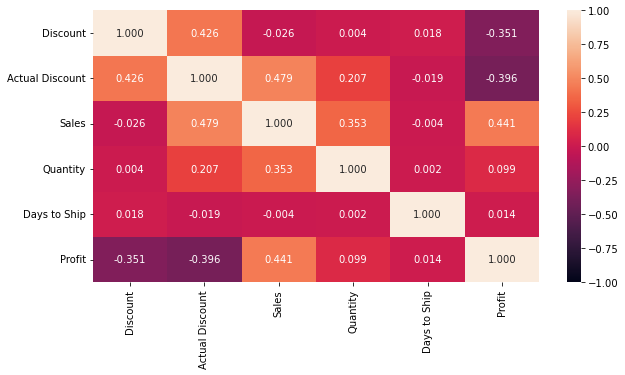

In [7]:
corr=mart.corr()
plt.figure(figsize=(10,5))
sns.heatmap(corr,vmin=-1,vmax=1,annot=True,fmt='.3f')
_=plt.xticks(rotation=90)

### Handeling Outliers

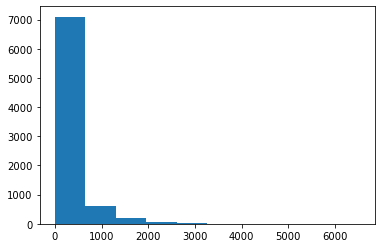

In [8]:
f1=mart['Sales'].reset_index()
_=plt.hist(f1.Sales)

In [9]:
min_thresold,max_thresold=mart.Sales.quantile([0,0.85])# Using quantile for handling outliers
print(min_thresold)
print(max_thresold)

3.0
536.0


In [10]:
df_mart=mart[(mart.Sales > min_thresold)&(mart.Sales < max_thresold)]

In [11]:
df_mart.shape

(6834, 19)

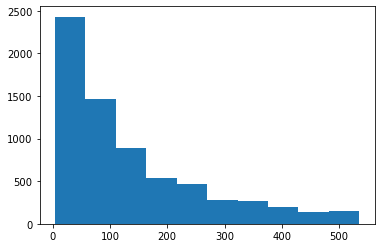

In [12]:
f2=df_mart['Sales'].reset_index()
_=plt.hist(f2.Sales)

$Observation :$
<b><i> The outliers have been handled, now the data set is clean.

### Data Pre-processing

$Label Encoder()$

In [13]:
objcol=mart.select_dtypes(include='object').columns
objcol

Index(['Order ID', 'Customer Name', 'Product Name', 'Category', 'Sub-Category',
       'Order Date', 'City', 'Country', 'Region', 'Segment', 'Ship Date',
       'Ship Mode', 'State'],
      dtype='object')

In [14]:
from sklearn.preprocessing import LabelEncoder 
lb=LabelEncoder()
df_mart['Order ID']=lb.fit_transform(df_mart['Order ID'])
df_mart['Product Name']=lb.fit_transform(df_mart['Product Name'])
df_mart['Category']=lb.fit_transform(df_mart['Category'])
df_mart['Sub-Category']=lb.fit_transform(df_mart['Sub-Category'])
df_mart['City']=lb.fit_transform(df_mart['City'])
df_mart['Country']=lb.fit_transform(df_mart['Country'])
df_mart['Region']=lb.fit_transform(df_mart['Region'])
df_mart['Segment']=lb.fit_transform(df_mart['Segment'])
df_mart['Ship Mode']=lb.fit_transform(df_mart['Ship Mode'])
df_mart['State']=lb.fit_transform(df_mart['State'])

$Standard Scaler()$

In [15]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()# Using Standard Scaler for standardization
od=['Order ID','Product Name','City']
df_mart[od]=scaler.fit_transform(df_mart[od])

In [16]:
df_mart.head()

,Order ID,Customer Name,Product Name,Discount,Actual Discount,Sales,Quantity,Category,Sub-Category,Order Date,City,Country,Region,Segment,Ship Date,Days to Ship,Ship Mode,State,Profit
0,1.059366,Ruby Patel,-0.385196,0.5,22.5,45,3,1,12,01-01-2013,1.156793,12,1,2,05-01-2013,4,1,103,-26
2,-1.463797,Devin Huddleston,-1.040114,0.0,0.0,140,3,1,2,04-01-2013,1.378689,4,0,0,08-01-2013,4,0,7,21
3,0.980287,Mary Parker,-1.016227,0.5,13.5,27,2,1,2,04-01-2013,-1.415022,14,1,1,09-01-2013,5,0,41,-22
4,0.980287,Mary Parker,-0.550419,0.5,8.5,17,2,1,14,04-01-2013,-1.415022,14,1,1,09-01-2013,5,0,41,-1
5,-1.489544,Daniel Burke,-1.052058,0.0,0.0,90,3,1,2,05-01-2013,-0.807535,4,0,2,07-01-2013,2,3,7,21


$Observation$:
Now the data is preprocessed and ready split.

### Spliting the into dependent variable and independent variable

In [17]:
x=df_mart.drop(['Profit','Ship Date','Customer Name','Order Date'],axis=1)
y=df_mart['Profit']

In [18]:
x.head()

,Order ID,Product Name,Discount,Actual Discount,Sales,Quantity,Category,Sub-Category,City,Country,Region,Segment,Days to Ship,Ship Mode,State
0,1.059366,-0.385196,0.5,22.5,45,3,1,12,1.156793,12,1,2,4,1,103
2,-1.463797,-1.040114,0.0,0.0,140,3,1,2,1.378689,4,0,0,4,0,7
3,0.980287,-1.016227,0.5,13.5,27,2,1,2,-1.415022,14,1,1,5,0,41
4,0.980287,-0.550419,0.5,8.5,17,2,1,14,-1.415022,14,1,1,5,0,41
5,-1.489544,-1.052058,0.0,0.0,90,3,1,2,-0.807535,4,0,2,2,3,7


In [19]:
y.head()

0   -26
2    21
3   -22
4    -1
5    21
Name: Profit, dtype: int64

$Observation$:
<b> The data is split into a dependent variable and independent variables.

### Splitting the data into train and test data.

In [20]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.50,random_state=42)

In [21]:
x_train.shape

(3417, 15)

In [22]:
x_test.shape

(3417, 15)

$Observation$:
The data is splitted into train and test data.

In [39]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.metrics import classification_report,accuracy_score,confusion_matrix
from sklearn.linear_model import LinearRegression,LogisticRegression,Lasso
from sklearn.neighbors import KNeighborsRegressor

In [24]:
def mscore(model):
    print('model test score: ',model.score(x_test,y_test))
    print('model train score: ',model.score(x_train,y_train))

def metric(y_pred,y_test):
    print('MAE: ',mean_absolute_error(y_pred,y_test))
    print('MSE: ',mean_squared_error(y_pred,y_test))
    print('R2score: ',r2_score(y_pred,y_test))

#### Building Model

In [25]:
knn=KNeighborsRegressor(n_neighbors=40,metric='manhattan')# KNeighbors Regressor
knn.fit(x_train,y_train)
y_pred_knn=knn.predict(x_test)
metric(y_test,y_pred_knn)
mscore(knn)# model evaluation metrics

MAE:  21.53766461808604
MSE:  1292.4049436640328
R2score:  0.6410301245617269
model test score:  0.6410301245617269
model train score:  0.6523805237940035


In [26]:
lr=LinearRegression()# Linear Regression
lr.fit(x_train,y_train)
y_pred_lr=lr.predict(x_test)
metric(y_test,y_pred_lr)
mscore(lr)# model evaluation metrics

MAE:  21.241221413395554
MSE:  1173.9442231912992
R2score:  0.673932993187305
model test score:  0.673932993187305
model train score:  0.6641318314263602


In [27]:
lg=LogisticRegression()# Logistic Regression 
lg.fit(x_train,y_train)
y_pred_lg=lg.predict(x_test)
metric(y_test,y_pred_lg)
mscore(lg)# model evaluation metrics

MAE:  28.231782265144865
MSE:  2318.683055311677
R2score:  0.35597788322725776
model test score:  0.030728709394205442
model train score:  0.053263096283289436


### Saving The Best Model

In [28]:
import pickle as pkl
filename='linear_model.pkl'
pkl.dump(lr,open(filename,'wb'))

In [29]:
sample=pd.read_csv('Sample_Data.csv')
sample.head()

,Order ID,Customer Name,Product Name,Discount,Actual Discount,Sales,Quantity,Category,Sub-Category,Order Date,City,Country,Region,Segment,Ship Date,Days to Ship,Ship Mode,State,Profit
0,-0.049575,Joel Peters,-1.298896,0.15,17.4,116,2,2,13,17-09-2015,1.498731,4,0,2,22-09-2015,5,0,59,48
1,1.599124,Zachary Disher,-1.157561,0.00,0.0,148,5,1,2,27-08-2016,0.851231,7,2,0,01-09-2016,5,0,62,52
2,-1.545634,Nancy Fike,-1.067983,0.00,0.0,36,2,1,2,05-08-2013,-1.516876,13,0,0,10-08-2013,5,1,11,3
3,-1.261503,Hayden Perkins,1.629322,0.00,0.0,132,5,1,12,06-03-2014,1.404153,4,0,0,10-03-2014,4,1,59,26
4,0.903967,Cynthia Zielinski,1.611407,0.00,0.0,45,3,1,12,30-10-2016,-1.578716,4,0,2,03-11-2016,4,0,87,1


In [30]:
x1=sample.drop(['Customer Name','Order Date','Ship Date','Profit'],axis=1)
y2=sample['Profit']

In [31]:
lrs=pkl.load(open('linear_model.pkl','rb'))
y_pred=lrs.predict(x1)
metric(y2,y_pred)

MAE:  17.07240667072583
MSE:  614.6283255309493
R2score:  0.5913776238494235
